In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression, LogisticRegression 

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 

In [2]:
homevalues = pd.read_csv("datafiles/single_family_home_values.csv")
homevalues.dropna(inplace = True)

In [3]:
homevalues["lastSaleDate"] = pd.to_datetime(homevalues["lastSaleDate"])
homevalues["priorSaleDate"] = pd.to_datetime(homevalues["priorSaleDate"])
homevalues.dropna(inplace = True)

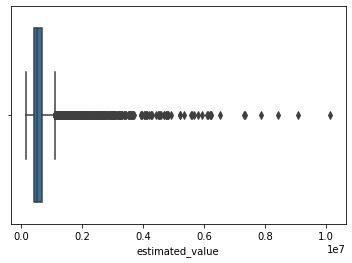

In [4]:
#upperOutlierCutoff = homevalues["estimated_value"].quantile(0.90)

#homevalues = homevalues[homevalues["estimated_value"] <= upperOutlierCutoff]
#homevalues = homevalues[homevalues["lastSaleAmount"] <= upperOutlierCutoff]
#homevalues.shape
sns.boxplot(homevalues.estimated_value)

In [5]:
X = homevalues[["bedrooms","bathrooms","rooms","squareFootage","lotSize", "yearBuilt", "priorSaleAmount"]]
y = homevalues.estimated_value

In [6]:
pca = PCA(4)

X_transf = pca.fit_transform(X)

In [7]:
for i in range(0, 4):
    print(X_transf[i])

[-9.68095175e+04  4.43260802e+03  3.52226592e+02 -5.74044697e+01]
[-2.62505343e+05  6.33825689e+03 -7.16828356e+02 -5.43653135e+00]
[-2.62515411e+05  4.50623188e+02 -1.10698173e+03 -7.05261990e+01]
[ 7.64843037e+04  2.69615450e+02 -4.56405127e+02 -6.53829931e+01]


In [8]:
lg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_transf, y)
lg.fit(X_train, y_train)
lg.score(X_test,y_test) #r2

0.7132579619356867

In [9]:
for i in range(1, 8):
    pca = PCA(i)
    X_transf = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_transf, y)
    lg.fit(X_train, y_train)
    print(str(i) + str(lg.score(X_test,y_test)))

10.32854985245358315
20.519818672828924
30.74247291966141
40.7486642275600542
50.7192047741249312
60.7254501869789733
70.8005570143394256


In [12]:
ess = pd.read_csv("datafiles/essdata.csv")

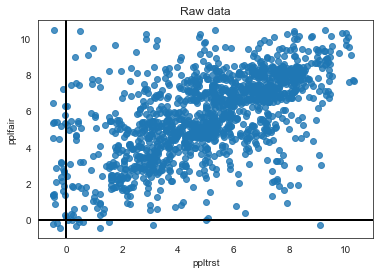

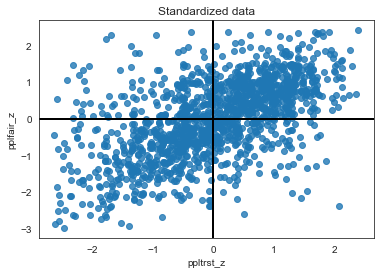

In [15]:
# Make the scatterplot matrix.

# Setting the default plot aesthetics to be prettier.
sns.set_style("white")

df = pd.read_csv('datafiles/ESSdata.csv')

print =(df.head(2))

# Take a subset of the data for PCA. This limits to Swiss and Czech data from 2012
# and keeps only specific columns.
df_pca = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6),
    ['tvtot','ppltrst','pplfair','pplhlp']
].dropna()

t = sns.regplot(
    'ppltrst',
    'pplfair',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
df_pca['ppltrst_z'] = (df_pca['ppltrst'] - df_pca['ppltrst'].mean()) / df_pca['ppltrst'].std()
df_pca['pplfair_z'] = (df_pca['pplfair'] - df_pca['pplfair'].mean()) / df_pca['pplfair'].std()

t = sns.regplot(
    'ppltrst_z',
    'pplfair_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()